In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

<center><font size="+2">Importing and splitting the data into validation set</font></center>

In [3]:
#import data from csv into DF

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv', index_col='id')
test_for_sub = pd.read_csv('test.csv')

In [4]:
train.shape

(60000, 785)

In [9]:
#splitting out validation set and dividing by 255 to normalize dataset

x_train_full = train.drop(columns='label', axis=1)
y_train_full = train['label']

x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = test / 255

<center><font size="+2">Building the DNN</font></center>

In [24]:
#building the layers

model = keras.models.Sequential()
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [25]:
#compiling the model

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [26]:
#setting early stop parameter

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [27]:
#fitting the model and tracking how long it takes

start = datetime.datetime.now()

history = model.fit(x_train, y_train, epochs=50, validation_data=(x_valid, y_valid), callbacks=[early_stopping_cb])

end = datetime.datetime.now()

print("Total Time: ", end-start)

Epoch 1/50
1719/1719 [==============================] - 2s 1ms/step - loss: 1.1462 - accuracy: 0.7150 - val_loss: 0.3073 - val_accuracy: 0.9254
Epoch 2/50
1719/1719 [==============================] - 2s 986us/step - loss: 0.1540 - accuracy: 0.9536 - val_loss: 0.2698 - val_accuracy: 0.9348
Epoch 3/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1100 - accuracy: 0.9656 - val_loss: 0.2619 - val_accuracy: 0.9352
Epoch 4/50
1719/1719 [==============================] - 2s 998us/step - loss: 0.0984 - accuracy: 0.9705 - val_loss: 0.2594 - val_accuracy: 0.9388
Epoch 5/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0821 - accuracy: 0.9751 - val_loss: 0.2667 - val_accuracy: 0.9352
Epoch 6/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0742 - accuracy: 0.9774 - val_loss: 0.2724 - val_accuracy: 0.9362
Epoch 7/50
1719/1719 [==============================] - 2s 980us/step - loss: 0.0634 - accuracy: 0.9812 - val_loss: 0.2593 - val_acc

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 316,810
Trainable params: 316,810
Non-trainable params: 0
_________________________________________________________________


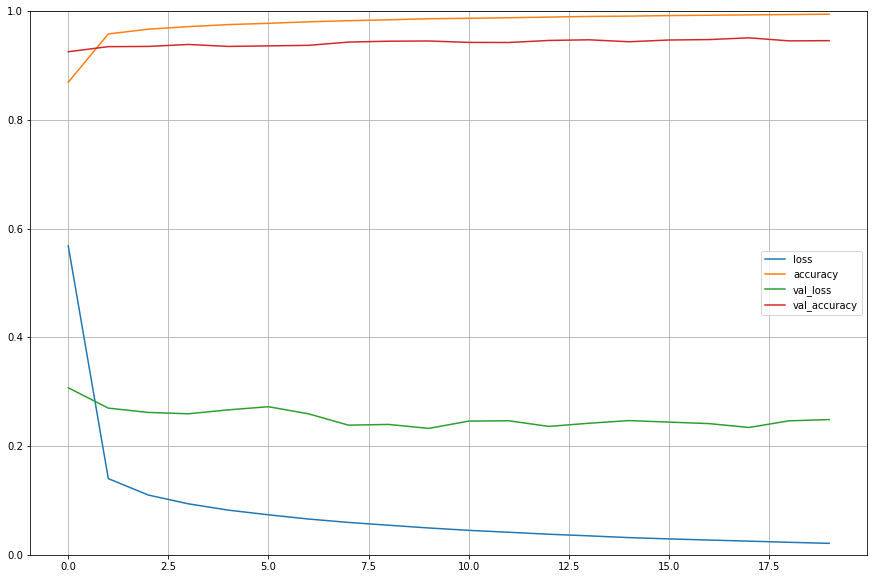

In [31]:
pd.DataFrame(history.history).plot(figsize=(15,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [30]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [ ]:
df = pd.DataFrame({
        'id':test_for_sub['id'],
        'label': predictions
         })

df.to_csv('submission.csv', index=False)

<center><font size="+2">Building the 2nd DNN</font></center>

In [32]:
#building the layers

model2 = keras.models.Sequential()
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dense(150, activation="elu", kernel_initializer="he_normal"))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dense(150, activation="elu", kernel_initializer="he_normal"))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dense(150, activation="elu", kernel_initializer="he_normal"))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dense(10, activation="softmax"))

In [33]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

In [34]:
#compiling the model

model2.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

In [35]:
#fitting the model and tracking how long it takes

start = datetime.datetime.now()

history2 = model2.fit(x_train, y_train, epochs=50, validation_data=(x_valid, y_valid), callbacks=[early_stopping_cb])

end = datetime.datetime.now()

print("Total Time: ", end-start)

Epoch 1/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4876 - accuracy: 0.8523 - val_loss: 0.2570 - val_accuracy: 0.9352
Epoch 2/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1287 - accuracy: 0.9611 - val_loss: 0.2442 - val_accuracy: 0.9366
Epoch 3/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1045 - accuracy: 0.9690 - val_loss: 0.2440 - val_accuracy: 0.9398
Epoch 4/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0862 - accuracy: 0.9738 - val_loss: 0.2351 - val_accuracy: 0.9446
Epoch 5/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0742 - accuracy: 0.9776 - val_loss: 0.2317 - val_accuracy: 0.9450
Epoch 6/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0632 - accuracy: 0.9813 - val_loss: 0.2154 - val_accuracy: 0.9498
Epoch 7/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0607 - accuracy: 0.9823 - val_loss: 0.2246 - val_accuracy:

In [36]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_8 (Dense)              (None, 150)               117750    
_________________________________________________________________
batch_normalization_1 (Batch (None, 150)               600       
_________________________________________________________________
dense_9 (Dense)              (None, 150)               22650     
_________________________________________________________________
batch_normalization_2 (Batch (None, 150)               600       
_________________________________________________________________
dense_10 (Dense)             (None, 150)               22650     
_________________________________________________________________
batch_normalization_3 (Batch (None, 150)              

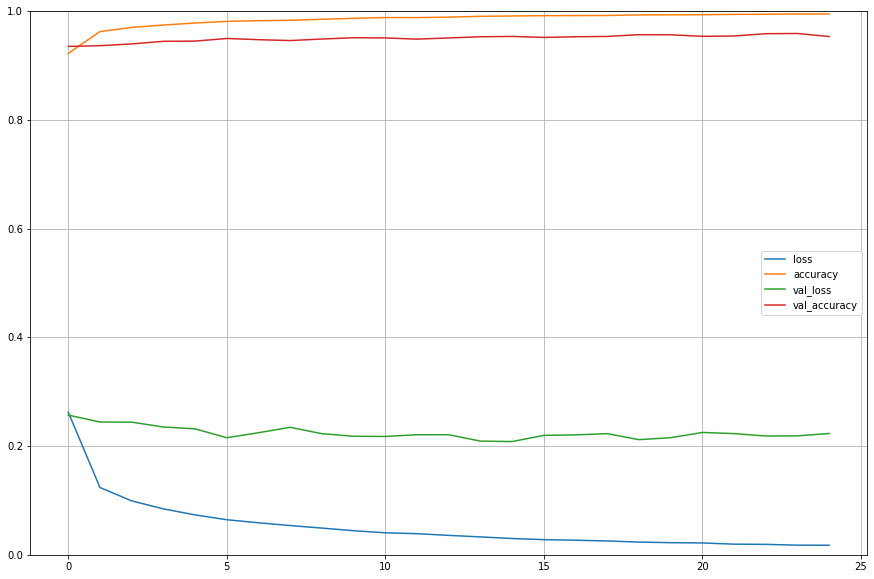

In [37]:
pd.DataFrame(history2.history).plot(figsize=(15,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [38]:
predictions2 = np.argmax(model2.predict(x_test), axis=-1)

In [39]:
df2 = pd.DataFrame({
        'id':test_for_sub['id'],
        'label': predictions2
         })

df2.to_csv('submission.csv', index=False)

<center><font size="+2">Building the 3rd DNN</font></center>

In [40]:
#building the layers

model3 = keras.models.Sequential()
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Dense(250, activation="elu", kernel_initializer="he_normal"))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Dense(200, activation="elu", kernel_initializer="he_normal"))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Dense(150, activation="elu", kernel_initializer="he_normal"))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Dense(10, activation="softmax"))

In [41]:
#compiling the model

model3.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

In [42]:
#fitting the model and tracking how long it takes

start = datetime.datetime.now()

history3 = model3.fit(x_train, y_train, epochs=50, validation_data=(x_valid, y_valid), callbacks=[early_stopping_cb])

end = datetime.datetime.now()

print("Total Time: ", end-start)

Epoch 1/50
1719/1719 [==============================] - 7s 3ms/step - loss: 0.4926 - accuracy: 0.8543 - val_loss: 0.2600 - val_accuracy: 0.9338
Epoch 2/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1210 - accuracy: 0.9635 - val_loss: 0.2276 - val_accuracy: 0.9412
Epoch 3/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0908 - accuracy: 0.9733 - val_loss: 0.2217 - val_accuracy: 0.9426
Epoch 4/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0717 - accuracy: 0.9793 - val_loss: 0.2282 - val_accuracy: 0.9402
Epoch 5/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0619 - accuracy: 0.9816 - val_loss: 0.2086 - val_accuracy: 0.9462
Epoch 6/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0518 - accuracy: 0.9843 - val_loss: 0.2180 - val_accuracy: 0.9446
Epoch 7/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0469 - accuracy: 0.9865 - val_loss: 0.2028 - val_accuracy:

In [43]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_4 (Batch (None, 784)               3136      
_________________________________________________________________
dense_12 (Dense)             (None, 300)               235500    
_________________________________________________________________
batch_normalization_5 (Batch (None, 300)               1200      
_________________________________________________________________
dense_13 (Dense)             (None, 250)               75250     
_________________________________________________________________
batch_normalization_6 (Batch (None, 250)               1000      
_________________________________________________________________
dense_14 (Dense)             (None, 200)               50200     
_________________________________________________________________
batch_normalization_7 (Batch (None, 200)              

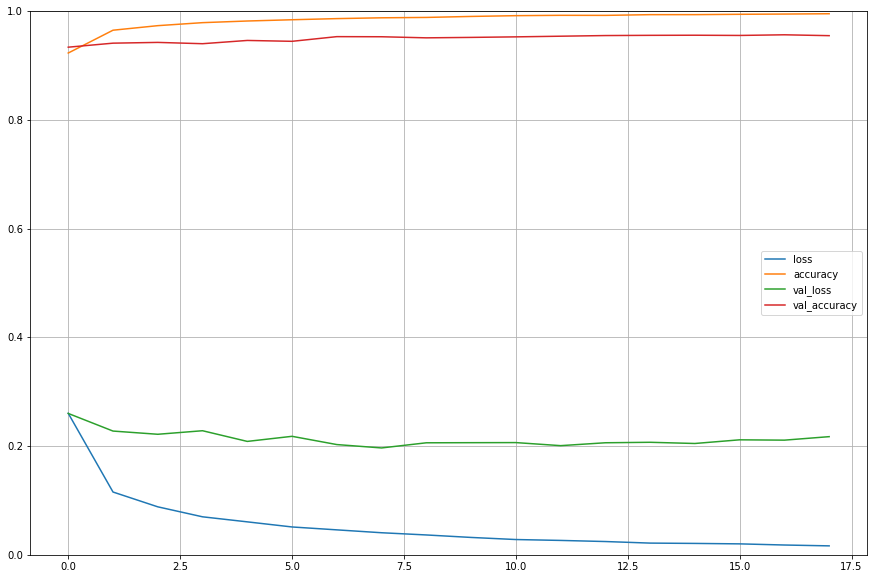

In [44]:
pd.DataFrame(history3.history).plot(figsize=(15,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [45]:
predictions3 = np.argmax(model3.predict(x_test), axis=-1)

In [46]:
df3 = pd.DataFrame({
        'id':test_for_sub['id'],
        'label': predictions3
         })

df3.to_csv('submission.csv', index=False)

<center><font size="+2">Building the 4th DNN</font></center>

In [54]:
#building the layers

model4 = keras.models.Sequential()
model4.add(keras.layers.BatchNormalization())
model4.add(keras.layers.Dense(500, activation="elu", kernel_initializer="he_normal"))
model4.add(keras.layers.BatchNormalization())
model4.add(keras.layers.Dense(500, activation="elu", kernel_initializer="he_normal"))
model4.add(keras.layers.BatchNormalization())
model4.add(keras.layers.Dense(500, activation="elu", kernel_initializer="he_normal"))
model4.add(keras.layers.BatchNormalization())
model4.add(keras.layers.Dense(500, activation="elu", kernel_initializer="he_normal"))
model4.add(keras.layers.BatchNormalization())
model4.add(keras.layers.Dense(500, activation="elu", kernel_initializer="he_normal"))
model4.add(keras.layers.BatchNormalization())
model4.add(keras.layers.Dense(10, activation="softmax"))

In [55]:
#compiling the model

model4.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

In [56]:
#fitting the model and tracking how long it takes

start = datetime.datetime.now()

history4 = model4.fit(x_train, y_train, epochs=50, validation_data=(x_valid, y_valid), callbacks=[early_stopping_cb])

end = datetime.datetime.now()

print("Total Time: ", end-start)

Epoch 1/50
1719/1719 [==============================] - 10s 5ms/step - loss: 0.3561 - accuracy: 0.8907 - val_loss: 0.2706 - val_accuracy: 0.9320
Epoch 2/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0947 - accuracy: 0.9709 - val_loss: 0.2599 - val_accuracy: 0.9398
Epoch 3/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0658 - accuracy: 0.9797 - val_loss: 0.2576 - val_accuracy: 0.9366
Epoch 4/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0493 - accuracy: 0.9842 - val_loss: 0.2500 - val_accuracy: 0.9412
Epoch 5/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0386 - accuracy: 0.9883 - val_loss: 0.2521 - val_accuracy: 0.9410
Epoch 6/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0340 - accuracy: 0.9899 - val_loss: 0.2415 - val_accuracy: 0.9458
Epoch 7/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0259 - accuracy: 0.9925 - val_loss: 0.2488 - val_accuracy

In [50]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_10 (Batc (None, 784)               3136      
_________________________________________________________________
dense_18 (Dense)             (None, 150)               117750    
_________________________________________________________________
batch_normalization_11 (Batc (None, 150)               600       
_________________________________________________________________
dense_19 (Dense)             (None, 150)               22650     
_________________________________________________________________
batch_normalization_12 (Batc (None, 150)               600       
_________________________________________________________________
dense_20 (Dense)             (None, 150)               22650     
_________________________________________________________________
batch_normalization_13 (Batc (None, 150)              

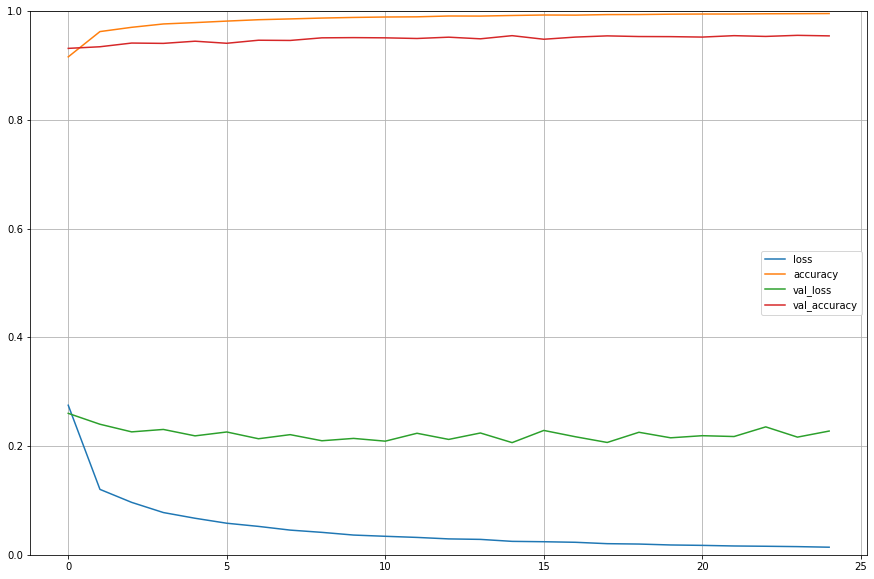

In [51]:
pd.DataFrame(history4.history).plot(figsize=(15,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [52]:
predictions4 = np.argmax(model4.predict(x_test), axis=-1)

In [53]:
df4 = pd.DataFrame({
        'id':test_for_sub['id'],
        'label': predictions4
         })

df4.to_csv('submission.csv', index=False)